<a href="https://colab.research.google.com/github/abdullohumar/healthcare-dataset-stroke-data/blob/main/predictiveanalyticsmahir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data
Kita akan mengambil dataset dari kaggle dengan judul healthcare dataset stroke data

Pertama kita harus mengunggah credential API (file kaggle.json) ke session Colab kita

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullohumar1","key":"8ac0c29786d4758373ac87a8095a3a7c"}'}

Setelah itu kita membuat direktori .kaggle di home directory, lalu kita salin file kaggle.json (berisi API key) ke direktori .kaggle dan kita ubah permission file kaggle.json agar hanya bisa dibaca oleh pemilik

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Setelahnya kita unduh dataset stroke dari Kaggle

In [3]:
!kaggle datasets download --force -d godfatherfigure/healthcare-dataset-stroke-data

Dataset URL: https://www.kaggle.com/datasets/godfatherfigure/healthcare-dataset-stroke-data
License(s): unknown
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 259MB/s]


Kita ekstrak file zip yang telah diunduh

In [4]:
import zipfile

with zipfile.ZipFile('/content/healthcare-dataset-stroke-data.zip', 'r') as zip_ref:
    zip_ref.extractall('stroke_dataset')

Kita lihat isi-nya

In [5]:
import os
os.listdir('stroke_dataset')

['healthcare-dataset-stroke-data.csv']

Kita cek kontennya (5 teratas)

In [6]:
import pandas as pd

df = pd.read_csv('/content/stroke_dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Kita lihat overview dataset kita

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Understanding


Cek jenis value apa saja yang ada di kolom kategorikal

In [8]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Pilih kolom bertipe kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# List untuk hasil
rows = []

for col in categorical_cols:
    unique_vals = df[col].unique()
    rows.append({
        'Kolom': col,
        'Unique Values': list(unique_vals),
        'Jumlah Unique': len(unique_vals)
    })

# Buat DataFrame dari hasil
result = pd.DataFrame(rows)

# Tampilkan tabel langsung
result

,Kolom,Unique Values,Jumlah Unique
0,gender,"[Male, Female, Other]",3
1,ever_married,"[Yes, No]",2
2,work_type,"[Private, Self-employed, Govt_job, children, Never_worked]",5
3,Residence_type,"[Urban, Rural]",2
4,smoking_status,"[formerly smoked, never smoked, smokes, Unknown]",4


Kita coba lihat sebaran datanya menggunakan grafik

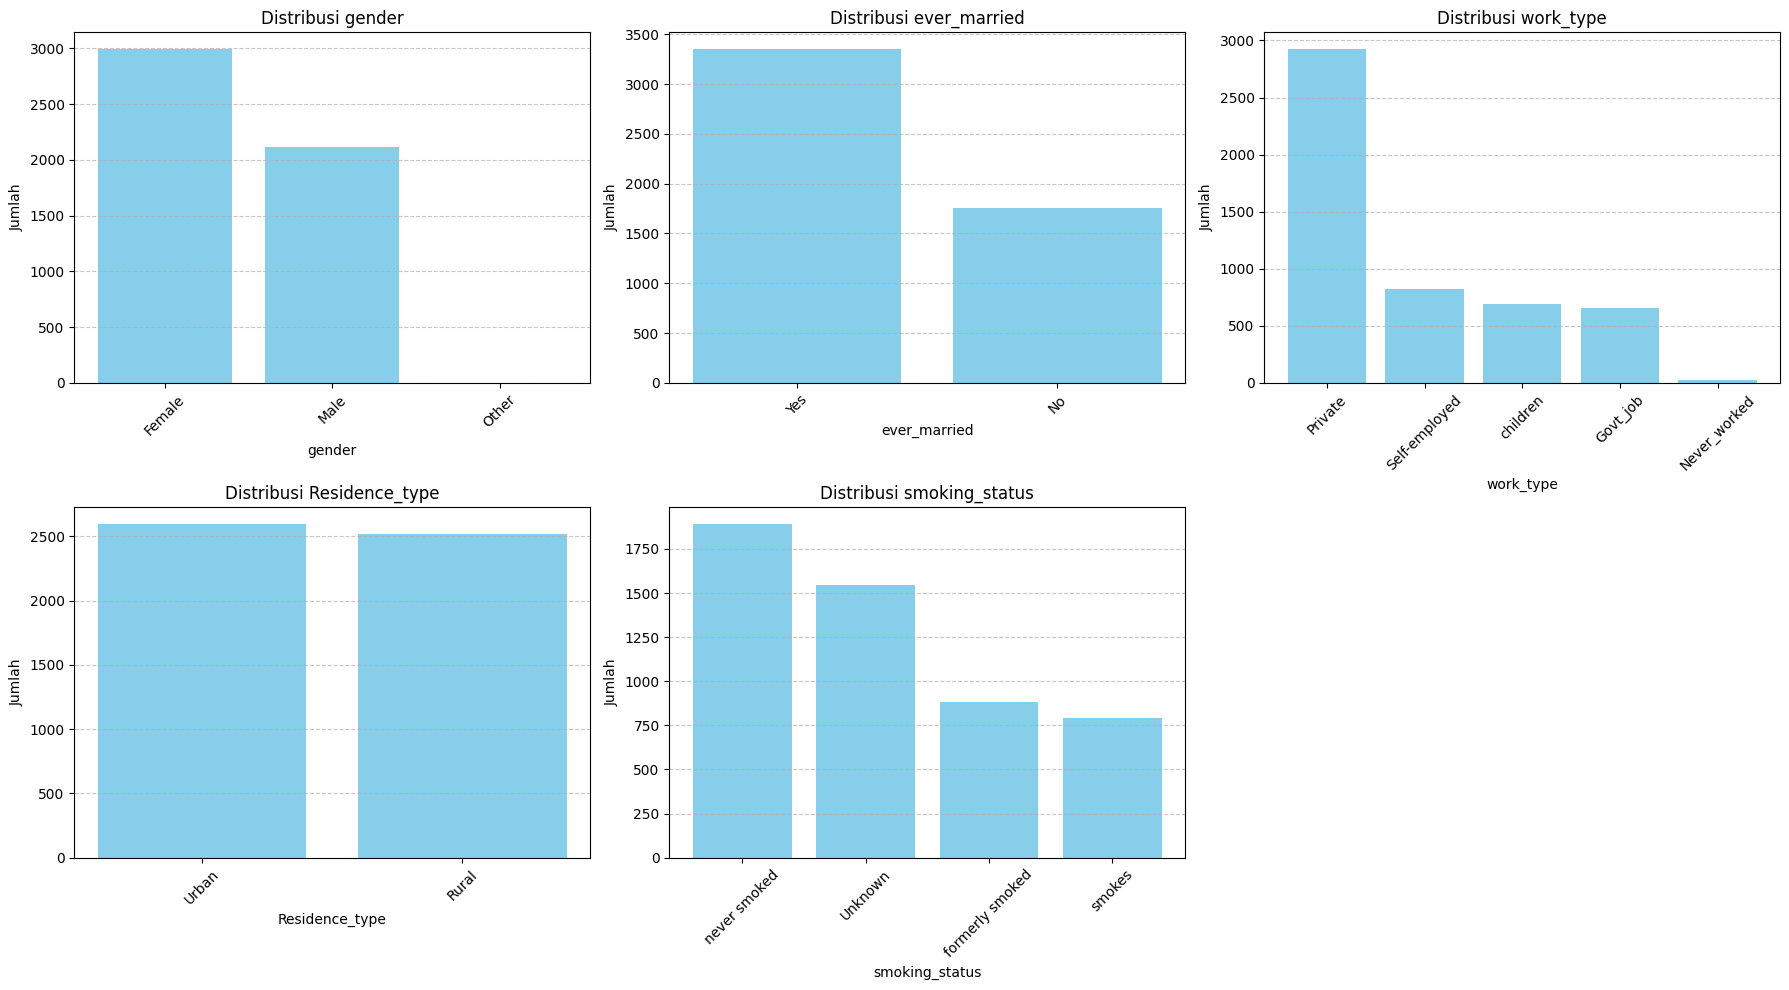

In [9]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts()

    axes[i].bar(counts.index, counts.values, color='skyblue')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Kita cek outliersnya

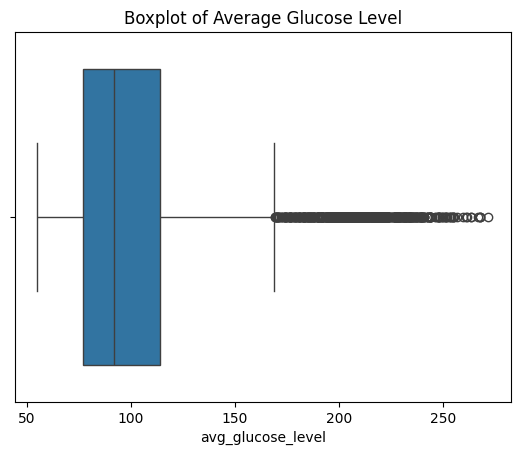

In [10]:
import seaborn as sns
# kita lihat pakai ilustrasi
import matplotlib.pyplot as plt

sns.boxplot(x='avg_glucose_level', data=df)
plt.title('Boxplot of Average Glucose Level')
plt.show()

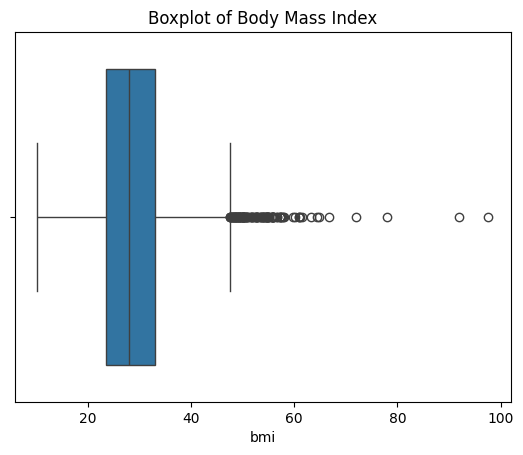

In [11]:
sns.boxplot(x='bmi', data=df)
plt.title('Boxplot of Body Mass Index')
plt.show()

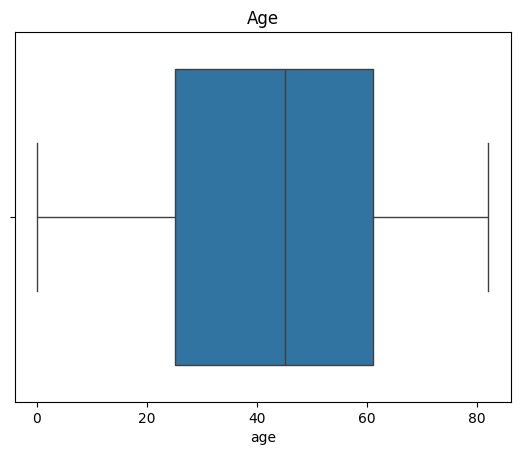

In [12]:
sns.boxplot(x='age', data=df)
plt.title('Age')
plt.show()

Kita coba visualisasikan menggunakan pie chart untuk melihat perbandingan data di kolom dengan value binary

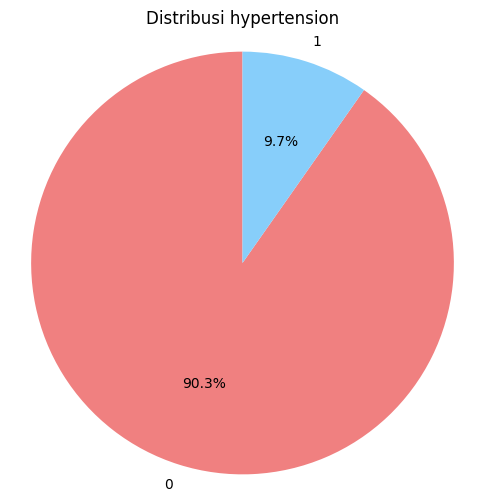

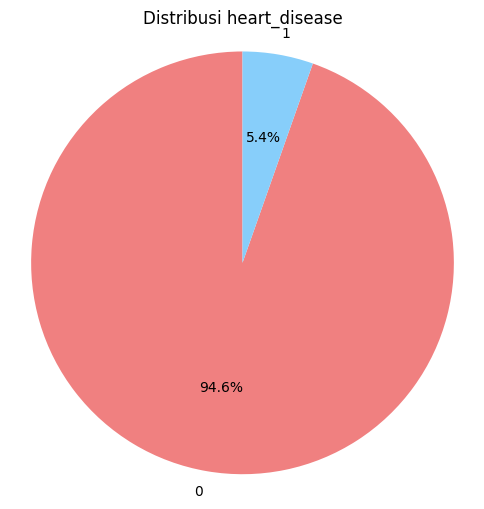

In [13]:
import matplotlib.pyplot as plt

binary_cols = ['hypertension', 'heart_disease']

for col in binary_cols:
    plt.figure(figsize=(6, 6))
    counts = df[col].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
    plt.title(f'Distribusi {col}')
    plt.axis('equal')
    plt.show()

Kita lihat sebaran data target

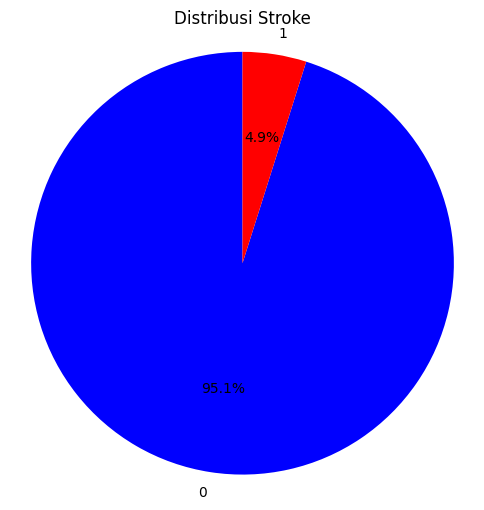

In [14]:
import matplotlib.pyplot as plt

# Pie chart untuk kolom stroke
plt.figure(figsize=(6, 6))
counts = df['stroke'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Distribusi Stroke')
plt.axis('equal')  # Supaya bentuk pie nya bulat sempurna
plt.show()


kita cek distribusi data numerik (selain biner)

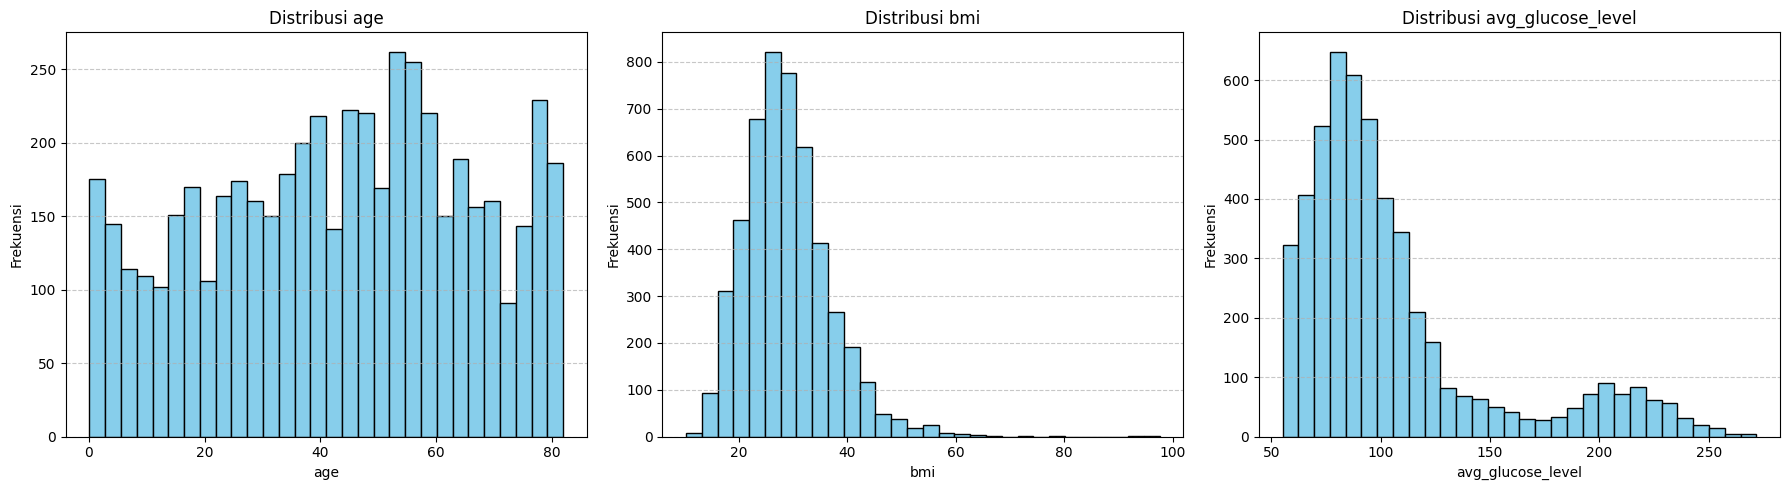

In [15]:
import matplotlib.pyplot as plt

# List kolom yang mau dibuat histogram
cols = ['age', 'bmi', 'avg_glucose_level']

# Buat figure besar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Looping buat plot masing-masing kolom
for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Kita lihat kolerasi data dengan heatmap

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

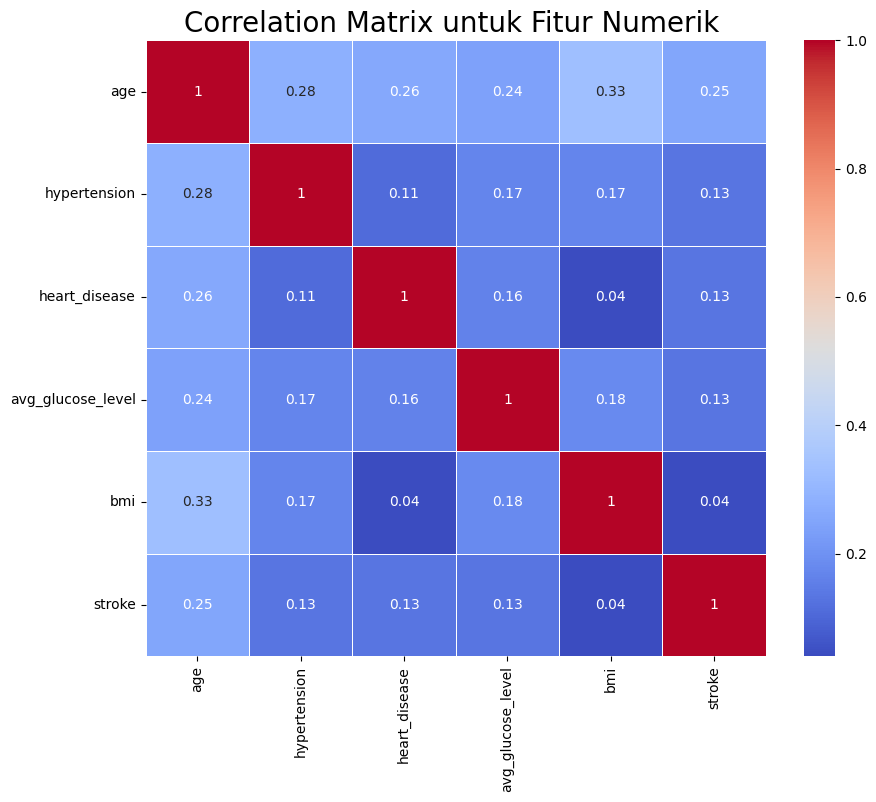

In [16]:
numerical_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation
Pada tahap ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahap persiapan data perlu dilakukan, yaitu:

1. Drop kolom yang tidak digunakan dalam pemrosesan data
2. Membersihkan data
3. Encoding fitur kategori
4. Pembagian dataset antara fitur dan target
5. SMOTE


### Drop kolom yang tidak digunakan dalam pemrosesan data
Pada tahap ini ada beberapa kolom pada dataset yang tidak perlu digunakan dalam pemrosesan data yakni id dan bmi. Kolom-kolom ini akan dihapus menggunakan fungsi drop().

In [17]:
df = df.drop(columns=['id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Pembersihan data
Disini kita akan drop data null, data unknown pada kolom `smoking_status`, data other pada `gender` dan pembersihan outliers untuk kolom `bmi` dan `avg_glucose_level`

In [18]:
# 1. Drop NaN pada smoking_status
df = df.dropna()

# 2. Drop baris 'Unknown' di smoking_status
df = df[df['smoking_status'] != 'Unknown']

# 3. Drop baris 'Other' di gender
df = df[df['gender'] != 'Other']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB


In [19]:
# 4. Penghapusan Outliers pada kolom bmi dan avg_glucose_level
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()

df_cleaned = remove_outliers_iqr(df_cleaned, 'bmi')

df_cleaned = remove_outliers_iqr(df_cleaned, 'avg_glucose_level')

print("Jumlah data setelah membersihkan outliers:", df_cleaned.shape[0])

Jumlah data setelah membersihkan outliers: 2890


### Encoding fitur kategori
Disini kita akan ubah fitur kategorikal menjadi numerik agar bisa diproses oleh model. Data yang binary akan kita ubah menggunakan `LabelEncoder` dan data yang multipel akan kita ubah menggunakan `HotEncoder`

In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Salin df biar gak ngubah aslinya
df_encoded = df_cleaned.copy()

# 1. Label encoding untuk binary
label_cols = ['gender', 'ever_married', 'Residence_type']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. One-hot encoding untuk kolom dengan lebih dari 2 kategori
df_encoded = pd.get_dummies(df_encoded, columns=['work_type', 'smoking_status'], drop_first=True)

# Hasil akhir
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
2,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,True
6,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,True,False
7,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,True,False
10,0,81.0,1,0,1,0,80.43,29.7,1,False,True,False,False,True,False


### Pembagian data antara fitur dan target
Pada proses ini, kita pisahkan antara kolom yang menjadi fitur dan kolom yang menjadi target, lalu kita pisahkan data menjadi data test dan data train

In [21]:
# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['stroke'])  # Semua kolom kecuali target
y = df_encoded['stroke']                # Target variabel

Kita atur mana seberapa seberapa besar data yang digunakan untuk pelatihan/train dan data untuk pengujian/test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2890
Total # of sample in train dataset: 2312
Total # of sample in test dataset: 578


### SMOTE
Mengatasi ketidakseimbangan data pada kolom target agar model tidak condong ke salah satu data

In [23]:
# Lakukan SMOTE hanya di X_train dan y_train
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [24]:
# Cek jumlah total sampel setelah SMOTE
print("Jumlah sampel setelah SMOTE:", X_train_smote.shape[0])

# Cek distribusi label setelah SMOTE
import pandas as pd
print("Distribusi label setelah SMOTE:\n", pd.Series(y_train_smote).value_counts())

Jumlah sampel setelah SMOTE: 4440
Distribusi label setelah SMOTE:
 stroke
0    2220
1    2220
Name: count, dtype: int64


## Model Development
Disini kita akan melakukan pemilihan model dengan cara kita latih beberapa model lalu kita pilih yang terbaik menurut saya. Kita akan menggunakan akurasi, precision, recall, dan F1 score untuk mengukur tingkat akurasinya

### Model 1: Logistic Regression
Logistic Regression adalah model yang mudah dipahami dan ditafsirkan, terutama dalam konteks klasifikasi biner seperti kasus prediksi stroke (0 = tidak stroke, 1 = stroke). Setiap koefisien pada model bisa menunjukkan hubungan log odds antara fitur dengan kemungkinan terjadinya stroke.

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:,1]

#### Evaluasi Model 1 : Logistic Regression

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_logreg))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=['No Stroke', 'Stroke']))

Logistic Regression Performance:
Accuracy: 0.8183391003460208
Precision: 0.12037037037037036
Recall: 0.5652173913043478
F1-Score: 0.1984732824427481
ROC-AUC: 0.7837054445750098

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.83      0.90       555
      Stroke       0.12      0.57      0.20        23

    accuracy                           0.82       578
   macro avg       0.55      0.70      0.55       578
weighted avg       0.94      0.82      0.87       578



### Model 2 : RandomForest
Kita mempertimbangkan Random Forest (RF) dalam proyek prediksi stroke karena model ini sangat kuat dan fleksibel, terutama untuk menangani data tabular.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]

#### Evaluasi Model 2 : RandomForest

In [28]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Stroke', 'Stroke']))

Random Forest Performance:
Accuracy: 0.8944636678200693
Precision: 0.12
Recall: 0.2608695652173913
F1-Score: 0.1643835616438356
ROC-AUC: 0.7826870348609478

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.97      0.92      0.94       555
      Stroke       0.12      0.26      0.16        23

    accuracy                           0.89       578
   macro avg       0.54      0.59      0.55       578
weighted avg       0.93      0.89      0.91       578



### Model 3 : XGBoost Classifier
Kita mempertimbangkan XGBoost Classifier dalam proyek prediksi stroke karena:
  - XGBoost unggul dalam mempelajari pola kompleks non-linear di data tabular seperti ini.
  - XGBoost memiliki kecepatan training tinggi dan optimasi yang efisien.
  - XGBoost memiliki mekanisme regularisasi bawaan untuk mengurangi overfitting.
  - Meskipun imbalance data telah ditangani dengan SMOTE, XGBoost tetap menjadi pilihan kuat karena kemampuannya menjaga kinerja tinggi pada data dengan kompleksitas fitur tinggi.



In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:31:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### Evaluasi Model 3 : XGBClassifier

In [30]:
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_xgb))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Stroke', 'Stroke']))

XGBoost Performance:
Accuracy: 0.9290657439446367
Precision: 0.05
Recall: 0.043478260869565216
F1-Score: 0.046511627906976744
ROC-AUC: 0.7607520564042303

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      0.97      0.96       555
      Stroke       0.05      0.04      0.05        23

    accuracy                           0.93       578
   macro avg       0.51      0.50      0.50       578
weighted avg       0.92      0.93      0.93       578



### Model 4 : AdaBoost Classifier
Kita menggunakan AdaBoost karena dia bisa meningkatkan kinerja prediksi dari model sederhana dengan memperbaiki kesalahan secara adaptif, cocok untuk data stroke yang bersih dan memiliki ketidakseimbangan kelas.

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train_smote, y_train_smote)
y_pred_ada = ada.predict(X_test)
y_pred_proba_ada = ada.predict_proba(X_test)[:,1]

#### Evaluasi Model 4 : AdaBoostClassifier

In [32]:
print("AdaBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1-Score:", f1_score(y_test, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_ada))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['No Stroke', 'Stroke']))

AdaBoost Performance:
Accuracy: 0.7664359861591695
Precision: 0.11643835616438356
Recall: 0.7391304347826086
F1-Score: 0.20118343195266272
ROC-AUC: 0.8072072072072072

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.77      0.86       555
      Stroke       0.12      0.74      0.20        23

    accuracy                           0.77       578
   macro avg       0.55      0.75      0.53       578
weighted avg       0.95      0.77      0.84       578



### Evaluasi Model

Kita akan melihat perbandingan hasil evaluasi antar model

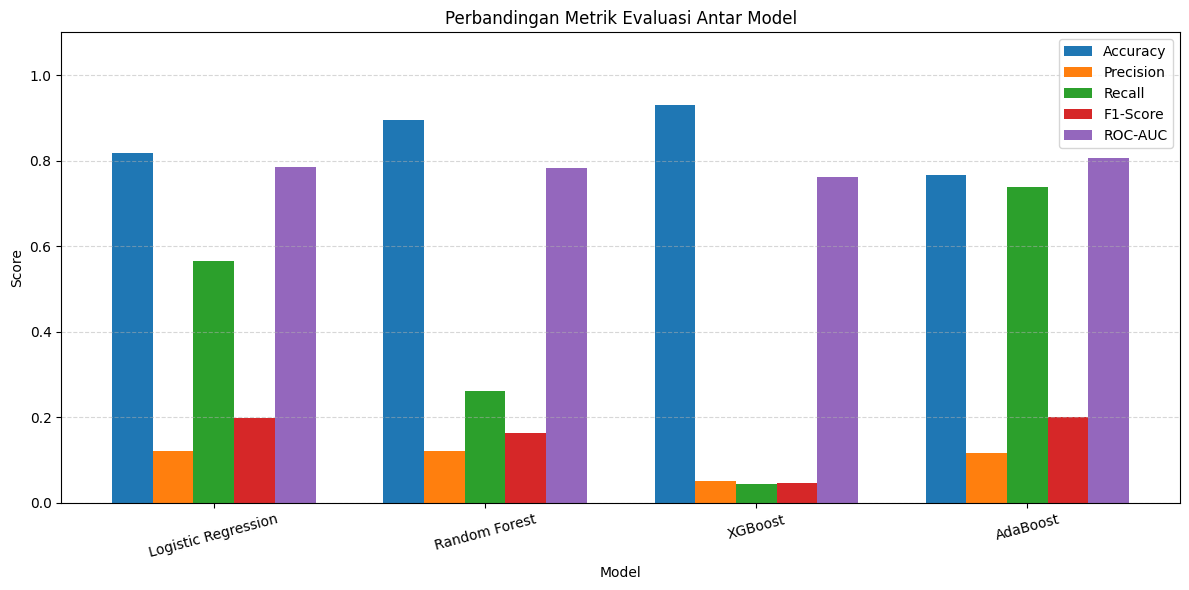

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai evaluasi masing-masing model
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost']
accuracy = [0.818, 0.894, 0.929, 0.766]
precision = [0.120, 0.120, 0.050, 0.116]
recall = [0.565, 0.261, 0.043, 0.739]
f1_score = [0.198, 0.164, 0.046, 0.201]
roc_auc = [0.784, 0.783, 0.761, 0.807]

# Lebar dan posisi bar
bar_width = 0.15
x = np.arange(len(models))

# Buat grafik
plt.figure(figsize=(12, 6))

plt.bar(x - 2*bar_width, accuracy, width=bar_width, label='Accuracy')
plt.bar(x - bar_width, precision, width=bar_width, label='Precision')
plt.bar(x, recall, width=bar_width, label='Recall')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1-Score')
plt.bar(x + 2*bar_width, roc_auc, width=bar_width, label='ROC-AUC')

# Label dan title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Metrik Evaluasi Antar Model')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()